In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [3]:
df= pd.read_pickle("final_train_test_risk_score.pkl.bz2",compression="bz2")

In [4]:
df.drop(["improvement","member_id"],axis=1,inplace=True)

In [5]:
X=df.drop(columns="score",axis=1)
y=df["score"]

In [6]:
# Test ,Train split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [7]:
X_train = scaler.fit_transform(X_train)

In [8]:
X_test = scaler.fit_transform(X_test)

In [9]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation ,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

In [12]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               9728      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 272,897
Trainable params: 272,897
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
643/660 [============================>.] - ETA: 0s - loss: 27.2438 - mean_absolute_error: 27.2438
Epoch 00001: val_loss improved from inf to 13.07715, saving model to Weights-001--13.07715.hdf5
660/660 [==============================] - 2s 3ms/step - loss: 26.8971 - mean_absolute_error: 26.8971 - val_loss: 13.0772 - val_mean_absolute_error: 13.0772
Epoch 2/500
652/660 [============================>.] - ETA: 0s - loss: 12.3147 - mean_absolute_error: 12.3147
Epoch 00002: val_loss improved from 13.07715 to 10.35611, saving model to Weights-002--10.35611.hdf5
660/660 [==============================] - 2s 2ms/step - loss: 12.3052 - mean_absolute_error: 12.3052 - val_loss: 10.3561 - val_mean_absolute_error: 10.3561
Epoch 3/500
650/660 [============================>.] - ETA: 0s - loss: 10.9909 - mean_absolute_error: 10.9909
Epoch 00003: val_loss improved from 10.35611 to 10.17166, saving model to Weights-003--10.17166.hdf5
660/660 [==============================] - 2s 2ms/step - l

In [16]:
NN_model.load_weights("Weights-453--7.01782.hdf5") # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [18]:
y_pred=NN_model.predict_on_batch(X_test)
y_pred.shape

(11308, 1)

In [20]:
y_test_arr=np.array(y_test)
y_test_arr=y_test_arr.reshape(y_test_arr.shape[0],-1)
y_test_arr.shape

(11308, 1)

In [21]:
diff=y_pred-y_test_arr

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

INFO:matplotlib.font_manager:generated new fontManager


In [26]:
!pip install -q matplotlib seaborn

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


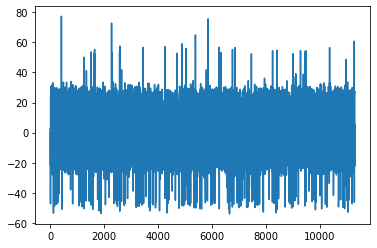

In [28]:
plt.plot(diff)

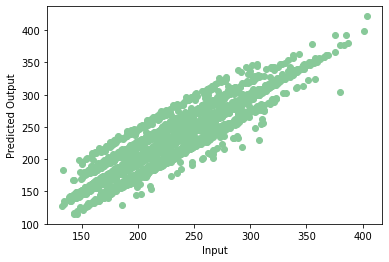

In [29]:
plt.scatter(np.squeeze(NN_model.predict_on_batch(X_test)),np.squeeze(y_test_arr),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()

In [31]:
y_pred

array([[217.24779],
       [279.1028 ],
       [242.00145],
       ...,
       [193.9799 ],
       [205.30226],
       [233.62794]], dtype=float32)

In [32]:
y_test_arr

array([[215.21852135],
       [276.0171065 ],
       [244.61629816],
       ...,
       [195.34761703],
       [178.00185277],
       [206.79461947]])